In [195]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_fr = pd.read_csv("the_office_lines_scripts.csv")

Question 5: Number of episodes where the character does not have a line, for each character

In [196]:
#made a copy of the data frame
required_df = data_fr.copy(deep=True)

In [197]:
#selected the charcters with less than 100 line to be able to drop them from the table lately
lines_per_character = data_fr.value_counts('speaker').to_frame()
lines_per_character.columns = ['nr_lines']
proper_char = lines_per_character.query("nr_lines <= 100")

In [198]:
#dropped from the copy of the dataframe not needed records
required_df.drop(required_df[required_df['speaker'].isin(list(proper_char.index))].index , inplace=True)

In [199]:
required_df['episodeId'] = required_df['season'].astype(str) + "-" + required_df['episode'].astype(str)
episode_amount = required_df['episodeId'].unique()

In [200]:
episodes = required_df.groupby('speaker')['episodeId'].unique().to_frame()
def calculate_difference(props):
    first_list = set(episode_amount)
    second_list = set(props)
    return  list(first_list.difference(second_list))

episodes['no_line_in'] = episodes.apply(lambda row: calculate_difference(row['episodeId']), axis=1)
episodes['nr_of_episodes'] = episodes.apply(lambda row: len(row['episodeId']), axis=1)
episodes['nr_no_lines_episodes'] = episodes.apply(lambda row: len(row['no_line_in']), axis=1)

print(episodes.head(31))

                                                       episodeId  \
speaker                                                            
Andy           [3-1, 3-3, 3-4, 3-5, 3-6, 3-7, 3-8, 3-9, 3-10,...   
Angela         [1-1, 1-2, 1-3, 1-4, 1-5, 1-6, 2-1, 2-2, 2-3, ...   
Charles               [5-18, 5-19, 5-20, 5-21, 5-22, 5-23, 5-26]   
Clark          [6-16, 9-1, 9-2, 9-3, 9-4, 9-5, 9-7, 9-11, 9-1...   
Creed          [2-5, 2-8, 2-10, 2-11, 2-12, 2-13, 2-14, 2-16,...   
Darryl         [1-5, 2-1, 2-2, 2-10, 2-11, 2-14, 2-15, 2-18, ...   
David          [2-16, 3-17, 3-22, 3-23, 4-8, 5-8, 5-9, 5-11, ...   
David Wallace  [4-5, 4-8, 5-4, 5-7, 5-13, 5-23, 6-2, 6-3, 6-1...   
Deangelo                                            [7-19, 7-22]   
Dwight         [1-1, 1-2, 1-3, 1-4, 1-5, 1-6, 2-1, 2-2, 2-3, ...   
Erin           [5-21, 5-23, 5-24, 5-25, 5-26, 6-1, 6-2, 6-3, ...   
Gabe           [6-14, 6-15, 6-17, 6-18, 6-20, 6-21, 6-22, 6-2...   
Holly          [4-14, 5-1, 5-2, 5-3, 5-4, 5-5, 5

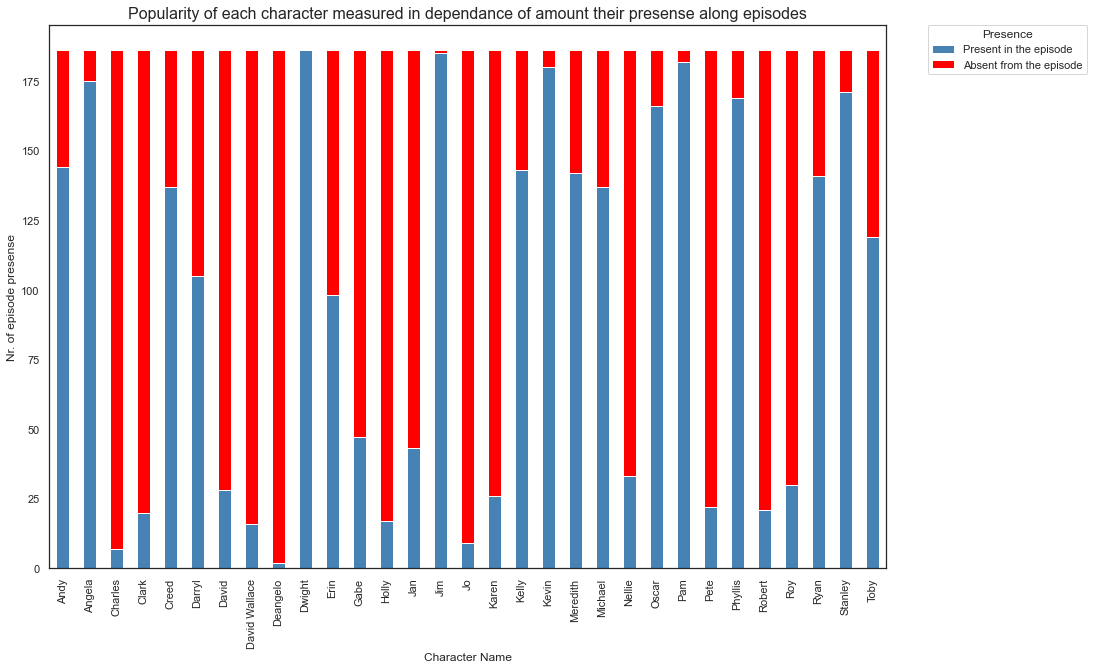

In [201]:
#Drawing the popularity grapth
sns.set(style='white')
episodes.set_index(episodes.index).plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.title("Popularity of each character measured in dependance of amount their presense along episodes", fontsize=16)
plt.xlabel("Character Name")
plt.ylabel("Nr. of episode presense")
plt.legend(title='Presence', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=['Present in the episode','Absent from the episode'])
plt.rcParams['figure.figsize'] = (15,10)